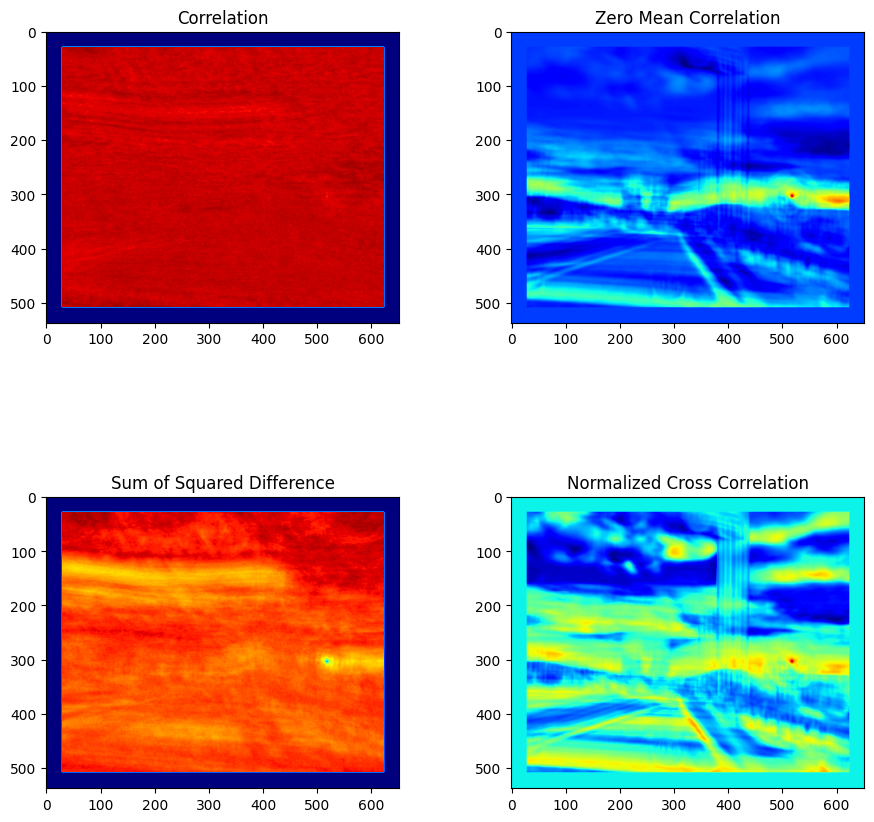

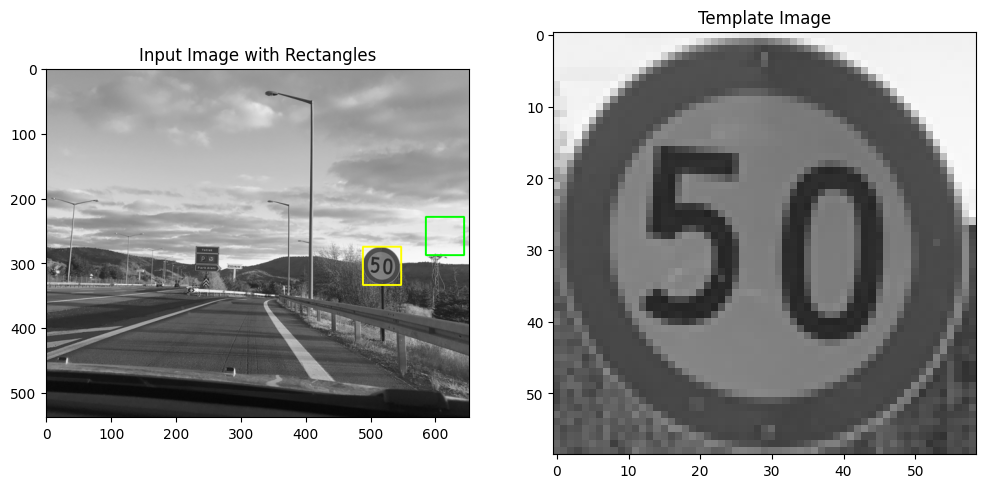

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def correlationMeasure(P, T):
    return np.sum(P * T)

def zeroMeanCorrelationMeasure(P, T):
    T_mean = np.mean(T)
    return np.sum(P * (T - T_mean))

def sumOfSquaredDifferenceMeasure(P, T):
    return np.sum((P - T) ** 2)

def normalizedCrossCorrelationMeasure(P, T):
    P_mean = np.mean(P)
    T_mean = np.mean(T)
    numerator = np.sum((P - P_mean) * (T - T_mean))
    denominator = np.sqrt(np.sum((P - P_mean) ** 2) * np.sum((T - T_mean) ** 2))
    return numerator / denominator

def template_matching(input_image, template_image, measure_function):
    h, w = template_image.shape
    M, N = input_image.shape
    a = h // 2
    b = w // 2
    result_image = np.zeros((M, N))
    for x in range(a, M - a):
        for y in range(b, N - b):
            patch = input_image[x - a:x + a + 1, y - b:y + b + 1]
            result_image[x, y] = measure_function(patch, template_image)
    return result_image

# Read the input and template images
input_image = cv2.imread(r"C:\Users\ecena\OneDrive\Belgeler\Image Processing - Different Measurements\input.png", cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread(r"C:\Users\ecena\OneDrive\Belgeler\Image Processing - Different Measurements\template.png", cv2.IMREAD_GRAYSCALE)


# Perform template matching
correlation_result = template_matching(input_image, template_image, correlationMeasure)
zero_mean_result = template_matching(input_image, template_image, zeroMeanCorrelationMeasure)
squared_difference_result = template_matching(input_image, template_image, sumOfSquaredDifferenceMeasure)
normalized_cross_correlation_result = template_matching(input_image, template_image, normalizedCrossCorrelationMeasure)

# Convert the result images to unsigned 8-bit integers
correlation_result = cv2.normalize(correlation_result, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
zero_mean_result = cv2.normalize(zero_mean_result, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
squared_difference_result = cv2.normalize(squared_difference_result, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
normalized_cross_correlation_result = cv2.normalize(normalized_cross_correlation_result, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Create a subplot with spacing between images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)

# Display the resulting images using matplotlib
axs[0, 0].imshow(correlation_result, cmap='jet')
axs[0, 0].set_title('Correlation')

axs[0, 1].imshow(zero_mean_result, cmap='jet')
axs[0, 1].set_title('Zero Mean Correlation')

axs[1, 0].imshow(squared_difference_result, cmap='jet')
axs[1, 0].set_title('Sum of Squared Difference')

axs[1, 1].imshow(normalized_cross_correlation_result, cmap='jet')
axs[1, 1].set_title('Normalized Cross Correlation')

plt.show()

# Read the input and template images
input_image = cv2.imread(r"C:\Users\ecena\OneDrive\Belgeler\Image Processing - Different Measurements\input.png", cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread(r"C:\Users\ecena\OneDrive\Belgeler\Image Processing - Different Measurements\template.png", cv2.IMREAD_GRAYSCALE)

# Perform template matching with correlation similarity measure
correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCORR)
_, _, _, max_loc_correlation = cv2.minMaxLoc(correlation_result)

# Perform template matching with zero-mean correlation similarity measure
zero_mean_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc_zero_mean = cv2.minMaxLoc(zero_mean_result)

# Perform template matching with normalized cross-correlation similarity measure
normalized_cross_correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF)
_, _, _, max_loc_normalized_cross_correlation = cv2.minMaxLoc(normalized_cross_correlation_result)

# Perform template matching with sum of squared difference dissimilarity measure
squared_difference_result = cv2.matchTemplate(input_image, template_image, cv2.TM_SQDIFF)
_, _, min_loc_squared_difference, _ = cv2.minMaxLoc(squared_difference_result)

# Draw rectangles around the neighborhoods of maximum similarity and minimum dissimilarity pixels
input_image_with_rectangles = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
template_h, template_w = template_image.shape[:2]

cv2.rectangle(input_image_with_rectangles, max_loc_correlation, (max_loc_correlation[0] + template_w, max_loc_correlation[1] + template_h), (0, 255, 0), 2)
cv2.rectangle(input_image_with_rectangles, max_loc_zero_mean, (max_loc_zero_mean[0] + template_w, max_loc_zero_mean[1] + template_h), (0, 0, 255), 2)
cv2.rectangle(input_image_with_rectangles, max_loc_normalized_cross_correlation, (max_loc_normalized_cross_correlation[0] + template_w, max_loc_normalized_cross_correlation[1] + template_h), (255, 0, 0), 2)
cv2.rectangle(input_image_with_rectangles, min_loc_squared_difference, (min_loc_squared_difference[0] + template_w, min_loc_squared_difference[1] + template_h), (0, 255, 255), 2)

# Convert images to RGB format for displaying with matplotlib
input_image_rgb = cv2.cvtColor(input_image_with_rectangles, cv2.COLOR_BGR2RGB)
template_image_rgb = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)

# Display input image and template image with rectangles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(input_image_rgb)
ax1.set_title('Input Image with Rectangles')
ax2.imshow(template_image_rgb)
ax2.set_title('Template Image')
plt.show()